Rusheel Sharma

I069

EC LAB 2

# a.
To solve knapsack problem using any classical approach

In [ ]:
def knapsack_01(values, weights, capacity, n):
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(
                    values[i - 1] + dp[i - 1][w - weights[i - 1]],
                    dp[i - 1][w]
                )
            else:
                dp[i][w] = dp[i - 1][w]

    return dp

In [ ]:
def find_selected_items(dp, values, weights, capacity, n):
    selected_items = []
    w = capacity

    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i)
            w -= weights[i - 1]

    remaining_weight = w
    return selected_items[::-1], remaining_weight

In [ ]:
def main():
    n = int(input("Enter number of items: "))
    capacity = int(input("Enter capacity of knapsack: "))

    values = []
    weights = []

    print("Enter values and weights of the items:")
    for i in range(n):
        values.append(int(input(f"Item {i + 1} - Value: ")))
        weights.append(int(input(f"Item {i + 1} - Weight: ")))

    dp = knapsack_01(values, weights, capacity, n)
    selected_items, remaining_weight = find_selected_items(
        dp, values, weights, capacity, n
    )

    print("\nMaximum profit earned =", dp[n][capacity])
    print("Selected items:", selected_items)
    print("Remaining weight in knapsack =", remaining_weight)

In [ ]:
main()

Enter number of items: 3
Enter capacity of knapsack: 15
Enter values and weights of the items:
Item 1 - Value: 5
Item 1 - Weight: 3
Item 2 - Value: 2
Item 2 - Weight: 7
Item 3 - Value: 12
Item 3 - Weight: 6

Maximum profit earned = 17
Selected items: [1, 3]
Remaining weight in knapsack = 6


# b.
To solve knapsack problem using evolutionary approach

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def get_user_items():
    print("\n--- Input Item Data ---")
    print("Enter the list of weights separated by spaces (e.g., 2 5 10 5)")
    weights_str = input("Weights: ")

    print("Enter the list of values separated by spaces (e.g., 20 30 50 10)")
    values_str = input("Values: ")

    weights = [int(w) for w in weights_str.split()]
    values = [int(v) for v in values_str.split()]

    if len(weights) != len(values):
        print(f"Error: You entered {len(weights)} weights but {len(values)} values.")
        print("They must be the same length. Please restart.")
        return None

    items = []
    for w, v in zip(weights, values):
        items.append({'w': w, 'v': v})

    return items

In [3]:
def create_individual(n):
    return [random.randint(0, 1) for _ in range(n)]

In [4]:
def initialize_population(pop_size, n):
    return [create_individual(n) for _ in range(pop_size)]

In [5]:
def calculate_fitness(individual, items, capacity):

    total_weight = 0
    total_value = 0

    for i, gene in enumerate(individual):
        if gene == 1:
            total_weight += items[i]['w']
            total_value += items[i]['v']


    if total_weight > capacity:
        return 0
    else:
        return total_value

In [6]:
def parent_selection(population, fitnesses):
    idx1 = random.randint(0, len(population) - 1)
    idx2 = random.randint(0, len(population) - 1)

    if fitnesses[idx1] > fitnesses[idx2]:
        return population[idx1]
    else:
        return population[idx2]

In [7]:
def crossover(parent1, parent2):
    n = len(parent1)
    if n < 2: return parent1, parent2

    crossover_point = random.randint(1, n - 1)

    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    return offspring1, offspring2

In [8]:
def mutation(individual, mutation_prob):
    mutated_ind = []
    for gene in individual:
        if random.random() < mutation_prob:
            mutated_ind.append(1 - gene)
        else:
            mutated_ind.append(gene)
    return mutated_ind

In [9]:
def survival_selection(offspring_population):
    return offspring_population

--- Binary Knapsack Problem - User Defined Items ---

--- Input Item Data ---
Enter the list of weights separated by spaces (e.g., 2 5 10 5)
Weights: 2 4 7 8 
Enter the list of values separated by spaces (e.g., 20 30 50 10)
Values: 21 24 54 23
Successfully loaded 4 items.
Enter Knapsack Capacity (Max Weight): 15
Enter Population Size: 500
Enter Number of Offspring: 500
Enter Termination (Max Generations): 10
Generation 10: Best Value = 99

       FINAL SOLUTION       
Best Value Achieved: 99
Total Weight:        13 / 15
Binary Chromosome:   [1, 1, 1, 0]
------------------------------
Items Selected (0-indexed):
  Item 0: Weight=2, Value=21
  Item 1: Weight=4, Value=24
  Item 2: Weight=7, Value=54


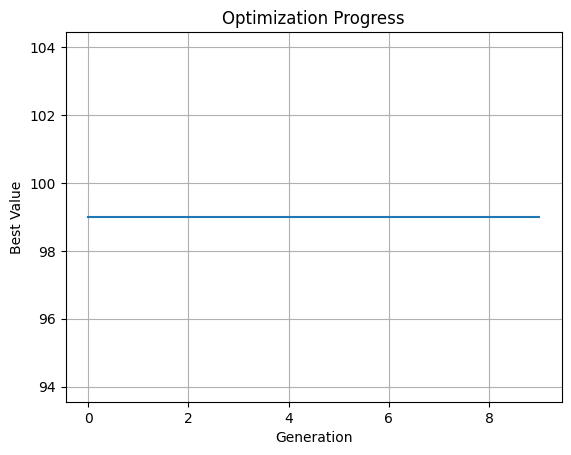

In [10]:
def run_evolutionary_algorithm():
    print("--- Binary Knapsack Problem - User Defined Items ---")

    items = get_user_items()
    if items is None: return

    n_items = len(items)
    print(f"Successfully loaded {n_items} items.")


    try:
        capacity = int(input("Enter Knapsack Capacity (Max Weight): "))
        pop_size = int(input("Enter Population Size: "))
        num_offspring = int(input("Enter Number of Offspring: "))
        max_generations = int(input("Enter Termination (Max Generations): "))
    except ValueError:
        print("Invalid input. Please enter integers.")
        return

    population = initialize_population(pop_size, n_items)

    mutation_prob = 1 / n_items
    best_fitness_history = []

    for gen in range(max_generations):
        fitnesses = [calculate_fitness(ind, items, capacity) for ind in population]

        best_fitness = max(fitnesses)
        best_fitness_history.append(best_fitness)

        offspring_pop = []
        while len(offspring_pop) < num_offspring:
            p1 = parent_selection(population, fitnesses)
            p2 = parent_selection(population, fitnesses)
            c1, c2 = crossover(p1, p2)
            c1 = mutation(c1, mutation_prob)
            c2 = mutation(c2, mutation_prob)
            offspring_pop.append(c1)
            if len(offspring_pop) < num_offspring:
                offspring_pop.append(c2)

        population = survival_selection(offspring_pop)

        if (gen + 1) % 10 == 0:
            print(f"Generation {gen+1}: Best Value = {best_fitness}")


    final_fitnesses = [calculate_fitness(ind, items, capacity) for ind in population]
    best_idx = final_fitnesses.index(max(final_fitnesses))
    best_solution = population[best_idx]
    best_val = final_fitnesses[best_idx]

    best_weight = 0
    selected_items_indices = []
    for i, gene in enumerate(best_solution):
        if gene == 1:
            best_weight += items[i]['w']
            selected_items_indices.append(i)

    print("\n" + "="*30)
    print("       FINAL SOLUTION       ")
    print("="*30)
    print(f"Best Value Achieved: {best_val}")
    print(f"Total Weight:        {best_weight} / {capacity}")
    print(f"Binary Chromosome:   {best_solution}")
    print("-" * 30)
    print("Items Selected (0-indexed):")
    for idx in selected_items_indices:
        print(f"  Item {idx}: Weight={items[idx]['w']}, Value={items[idx]['v']}")
    print("="*30)

    # Plot
    plt.plot(best_fitness_history)
    plt.title('Optimization Progress')
    plt.xlabel('Generation')
    plt.ylabel('Best Value')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    run_evolutionary_algorithm()